In [1]:
import pandas as pd

df = pd.read_csv('../data/processed/ebi_base_processed_model.csv', index_col=0)
df

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,-0.325787,0,0.416667,2,-0.762398,1,1,1,0.009204,1,0,0
1,-0.439823,0,0.333333,1,-0.105466,1,0,1,0.123165,0,0,1
2,0.503568,0,0.166667,1,-0.762398,2,0,0,-0.067380,0,0,0
3,2.068975,0,0.500000,2,0.221424,1,1,1,-0.217472,0,0,1
4,-0.056246,1,0.583333,8,0.129282,2,1,0,0.502038,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1.550628,0,-0.666667,2,-0.762398,2,0,0,0.685465,0,0,0
8996,-1.393581,1,-0.166667,10,-0.312704,1,1,1,0.012776,0,0,0
8997,0.607237,0,-0.083333,7,-0.762398,1,0,1,-0.594149,1,0,0
8998,1.260354,1,0.416667,3,-0.173917,2,1,0,-0.076930,1,1,0


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report


X = df.drop(columns=['churn'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)




In [3]:
random_forest_classifier = RandomForestClassifier(random_state=42)

random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)

train_score = random_forest_classifier.score(X_train, y_train)
test_score = random_forest_classifier.score(X_test,y_test)
print(train_score, test_score)
print(classification_report(y_test, y_pred))



1.0 0.8605555555555555
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1434
           1       0.76      0.46      0.57       366

    accuracy                           0.86      1800
   macro avg       0.82      0.71      0.74      1800
weighted avg       0.85      0.86      0.85      1800



In [4]:
param_grid = {
    'n_estimators': [200,300],
    'max_depth': [3,5,7],
    'min_samples_leaf': [20,50],
    'max_features': ['sqrt','log2'],
    'class_weight': ['balanced']
}

In [5]:
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=1)

In [6]:
grid.fit(X_train, y_train)
rf_best = grid.best_estimator_

In [7]:
train_score = rf_best.score(X_train, y_train)
test_score = rf_best.score(X_test, y_test)

y_pred = rf_best.predict(X_test)
print(train_score, test_score)
print(grid.best_params_)
print(classification_report(y_test, y_pred))


0.8138888888888889 0.8116666666666666
{'class_weight': 'balanced', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1434
           1       0.53      0.72      0.61       366

    accuracy                           0.81      1800
   macro avg       0.72      0.78      0.74      1800
weighted avg       0.84      0.81      0.82      1800



age                 0.421327
products_number     0.228409
balance             0.094169
active_member       0.083833
country_Germany     0.059447
estimated_salary    0.031827
credit_score        0.029527
gender              0.026017
tenure              0.015593
country_Spain       0.005185
credit_card         0.004664
dtype: float64


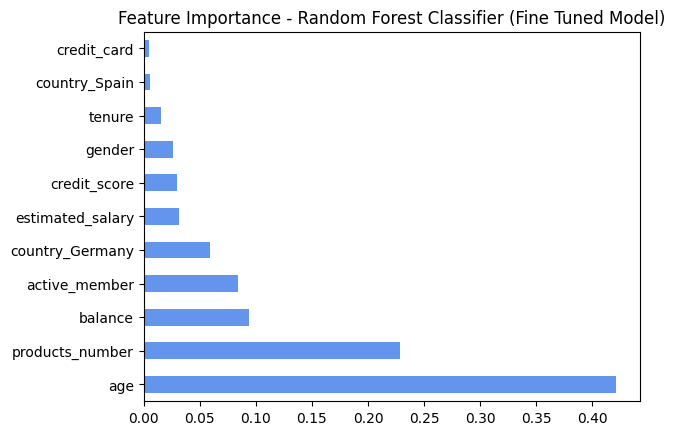

In [15]:
import matplotlib.pyplot as plt
feature_importance = pd.Series(rf_best.feature_importances_, index= X_train.columns).sort_values(ascending=False)
feature_importance.plot(kind='barh', color='cornflowerblue')
plt.title('Feature Importance - Random Forest Classifier (Fine Tuned Model)')
plt.savefig('../outputs/figures/model_feature_importance/rf_fine_tuned_model_feature_importances.png', dpi=300, bbox_inches='tight')
print(feature_importance)

In [9]:
import joblib
joblib.dump(random_forest_classifier, '../outputs/model/RF/rf_default_model.pkl')
joblib.dump(rf_best, '../outputs/model/RF/rf_fine_tuned_model.pkl')

['../outputs/model/RF/rf_fine_tuned_model.pkl']